<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# K-Means Clustering with Seeds Data

---

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

import seaborn as sns

### 1. Import the data

In [2]:
seeds = pd.read_csv("./datasets/seeds.csv")

In [3]:
# A:
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


### 2. Do some EDA of relationships between features.

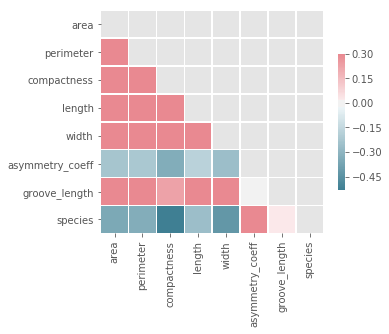

In [4]:
# A:
# Compute the correlation matrix
corr = seeds.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(5, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

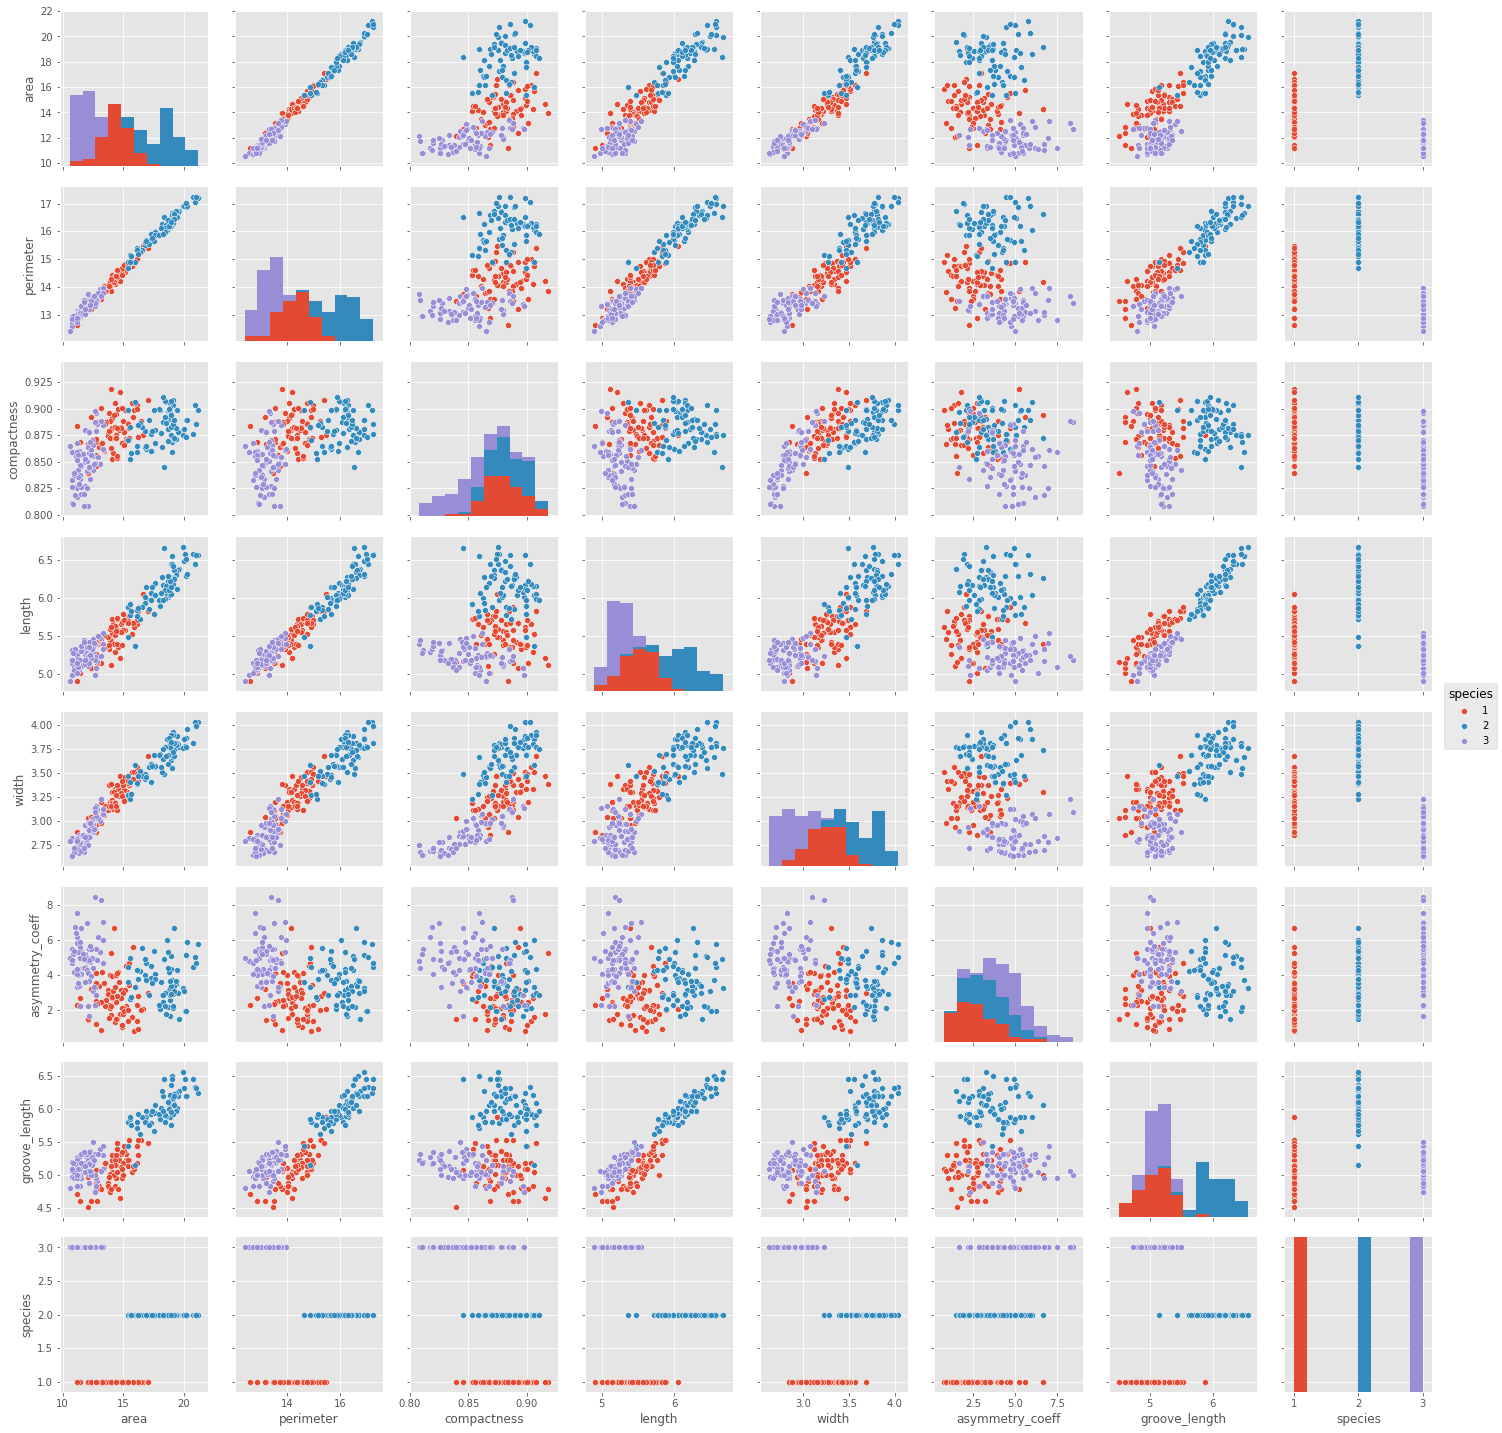

In [5]:
sns.pairplot(seeds, hue="species")

### 3. Prepare the data for clustering

1. Remove the `species` column. We will see if the clusters from K-Means end up like the actual species.
2. Put the features on the same scale.

In [6]:
# A:
df = seeds[seeds.columns[0:-1]]
trueSpecies = seeds['species']
df.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [7]:
from sklearn.preprocessing import normalize

ndf = pd.DataFrame(normalize(df), columns=df.columns)

In [8]:
ndf.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length
0,0.662718,0.644478,0.037826,0.250278,0.143835,0.096455,0.226696
1,0.664107,0.650272,0.039324,0.247880,0.148755,0.045434,0.221191
2,0.656884,0.647690,0.041601,0.243217,0.153395,0.124068,0.221796
3,0.649097,0.653787,0.041999,0.249696,0.158475,0.105947,0.225355
4,0.682446,0.633821,0.038198,0.239237,0.150612,0.057293,0.218814


### 4. Clustering with K-Means

- Cluster the data to our our target groups.
- We know that there are 3 actual classes. Lets try using 2, 4 and 6 cluster splits. Run the clustering algorithm with each of those k values.

In [9]:
# A:
k2model = cluster.KMeans(n_clusters=2)
k2model.fit(ndf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [10]:
k2label = k2model.labels_

In [11]:
metrics.silhouette_score(ndf, k2label)

0.50144852045607868

In [12]:
k4model = cluster.KMeans(n_clusters=4)
k4model.fit(ndf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [13]:
k4label = k4model.labels_
metrics.silhouette_score(ndf, k4label)

0.35362769660220345

In [14]:
k6model = cluster.KMeans(n_clusters=6)
k6model.fit(ndf)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=6, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [15]:
k6label = k6model.labels_
metrics.silhouette_score(ndf, k6label)

0.36114563145272288

### 5. Get the labels and centroids for the models

In [16]:
#A: centroids
k2centroid = k2model.cluster_centers_
k4centroid = k4model.cluster_centers_
k6centroid = k6model.cluster_centers_

### 6. Compute the Silhouette Score to evaluate your clustering models

Silhouette score ranges from -1 to 1, with 1 being the best.

### 7. Plot `length` vs. `groove_length` using the clusters from each model.

Each time, compare to the actual species classification.


In [22]:
# K2:
seeds['k2label'] = k2label
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species,k2label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,1


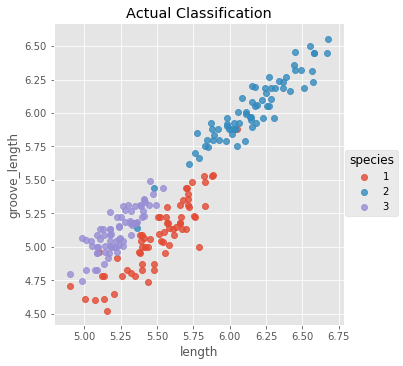

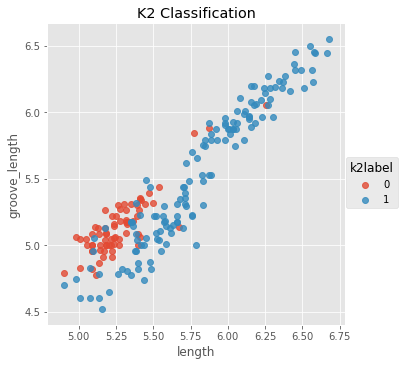

In [24]:
sns.lmplot(x='length', y='groove_length', data=seeds, hue='species', fit_reg=False)
plt.title('Actual Classification')
sns.lmplot(x='length', y='groove_length', data=seeds, hue='k2label', fit_reg=False)
plt.title('K2 Classification')

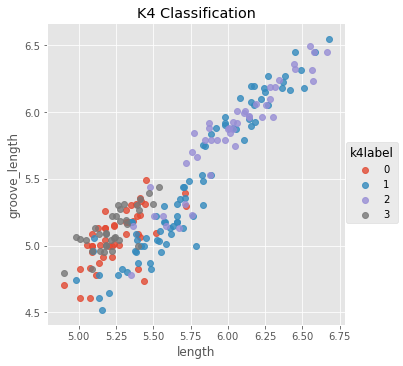

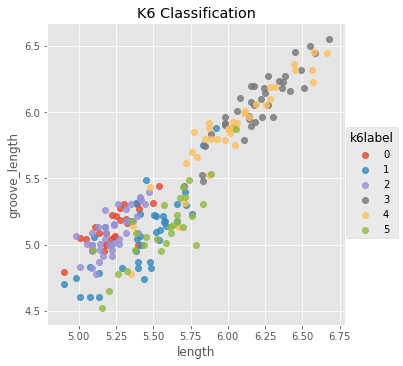

In [26]:
seeds['k4label'] = k4label
sns.lmplot(x='length', y='groove_length', data=seeds, hue='k4label', fit_reg=False)
plt.title('K4 Classification')
seeds['k6label'] = k6label
sns.lmplot(x='length', y='groove_length', data=seeds, hue='k6label', fit_reg=False)
plt.title('K6 Classification')

### 8. Evaluate a K-Means model with `k=3` clusters.

1. Construct the model.
- Print the labels and centroids.
- Evaluate the model with silhouette score.
- Plot `length` vs. `groove_length` and compare the clusters to the actual species.

In [29]:
seeds.head()

,area,perimeter,compactness,length,width,asymmetry_coeff,groove_length,species,k2label,k4label,k6label
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1,1,1,5
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1,1,1,5
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1,1,1,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1,1,1,5
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1,1,1,5


In [30]:
type(seeds)

pandas.core.frame.DataFrame

In [32]:
# Construct the model
k3model = cluster.KMeans(n_clusters=3)
k3model.fit(ndf)

# Get the labels
k3label = k3model.labels_

# Score the model
print(f"Silhouette score:{metrics.silhouette_score(ndf, k3label)}")

Silhouette score:0.360293855610459


In [33]:
seeds['k3label'] = k3label

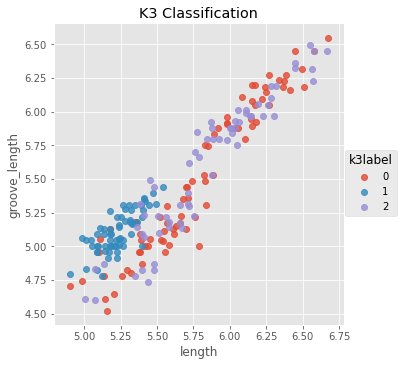

In [34]:
# Plot with length and groove length
sns.lmplot(x='length', y='groove_length', data=seeds, hue='k3label', fit_reg=False)
plt.title('K3 Classification')sns.pairplot(seeds, hue="species")

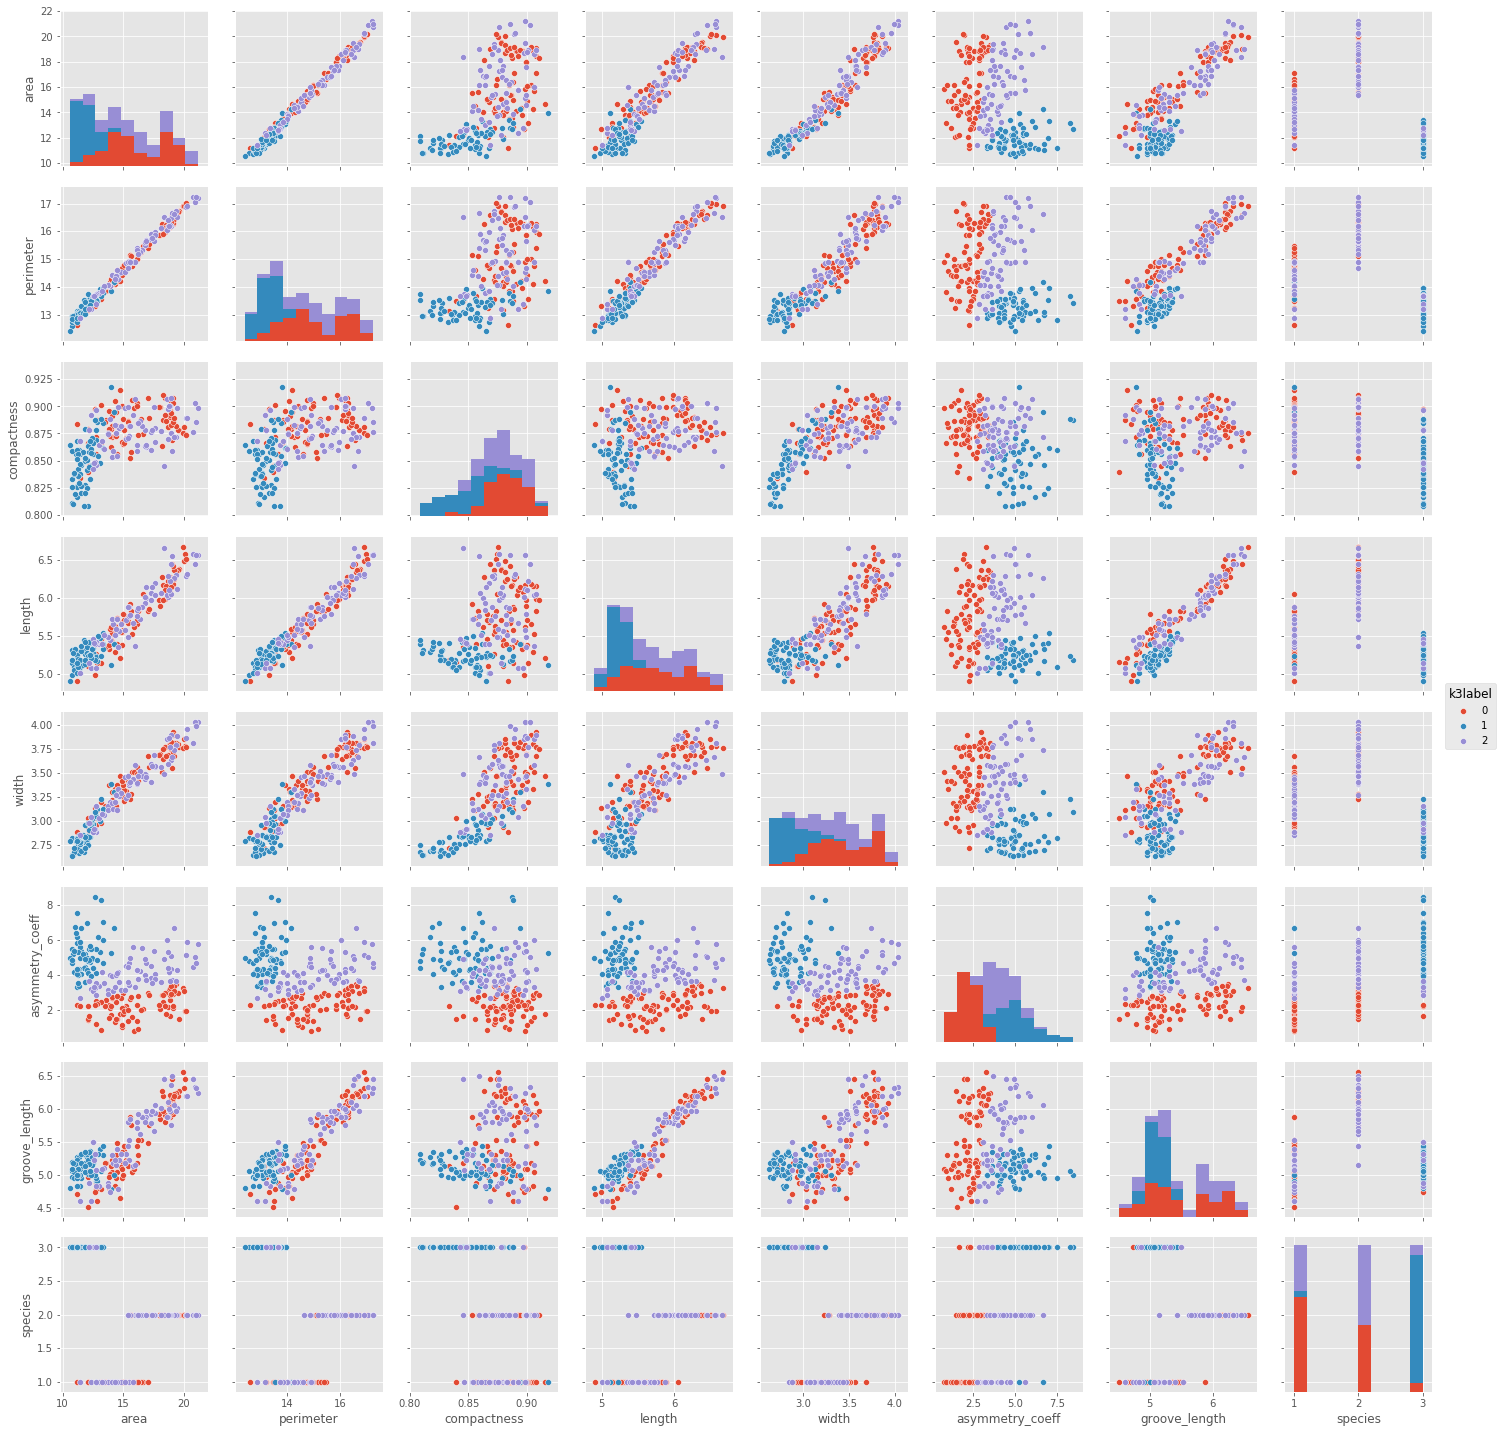

In [44]:
sns.pairplot(seeds, hue="k3label", vars=['area','perimeter', 'compactness','length','width','asymmetry_coeff','groove_length', 'species'])

In [ ]:
sns.pairplot(seeds, hue="k2label", vars=['area','perimeter', 'compactness','length','width','asymmetry_coeff','groove_length', 'species'])